### ---*---  Minimizing Churn Rate Through Analysis of Financial Habits #---*---

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.feature_selection import RFE

In [2]:
dataset = pd.read_csv('churn_data_part2.csv')

In [3]:
dataset.head() 

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
1,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
2,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
3,3120,1,32.0,R,5,3,111,5,0,227,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
4,41406,0,21.0,na,0,0,4,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0


In [4]:
dataset.shape
user_identifier = dataset['user']

In [5]:
def data_preparation(dataset):
    
    user_identifier = dataset['user']
    dataset = dataset.drop(columns = ['user'])
    # One-Hot Encoding
    print("============================= Total Housing =========================\n",dataset.housing.value_counts())
    dataset.groupby('housing')['churn'].nunique().reset_index()
    dataset = pd.get_dummies(dataset)
    print("============================= Total feature ===========================\n",dataset.columns)
    dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'],axis=1)
    print("============================= datashape ================================\n",dataset.shape)
    
    print("============================= After droping Na feature ===========================\n",dataset.columns)
    print("============================= data types of all feature ===========================\n",dataset.dtypes)
    return dataset

In [6]:
def prepare_data_for_model():
    df = data_preparation(dataset) # function call
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'churn'), df['churn'],test_size = 0.1,random_state = 0)
    print("================== Before balancing the Training Set ==================== \n",y_train.value_counts())
    sn.countplot(y_train,label = "Count")
    plt.show()
    pos_index = y_train[y_train.values == 1].index
    neg_index = y_train[y_train.values == 0].index
    if len(pos_index) > len(neg_index):
        higher = pos_index
        lower = neg_index
    else:
        higher = neg_index
        lower = pos_index

    random.seed(0)
    higher = np.random.choice(higher, size=len(lower))
    lower = np.asarray(lower)
    new_indexes = np.concatenate((lower, higher))

    X_train = X_train.loc[new_indexes,]
    y_train = y_train[new_indexes]
    print("==================== After balancing the Training Set ========================== \n",y_train.value_counts())
    sn.countplot(y_train,label = "Count")
    plt.show()
    print("============================= Feature Scaling ================================== \n")
    
    sc_X = StandardScaler()
    print("============================ is there any string ===============================\n",X_train.isin(['O']).sum())
    X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
    X_test2 = pd.DataFrame(sc_X.transform(X_test))
    X_train2.columns = X_train.columns.values
    X_test2.columns = X_test.columns.values
    X_train2.index = X_train.index.values
    X_test2.index = X_test.index.values
    X_train = X_train2
    X_test = X_test2
    return X_train, X_test, y_train, y_test 

============================= Total Housing =========================
 R     9221
na    7910
O     1834
Name: housing, dtype: int64
============================= Total feature ===========================
 Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_si

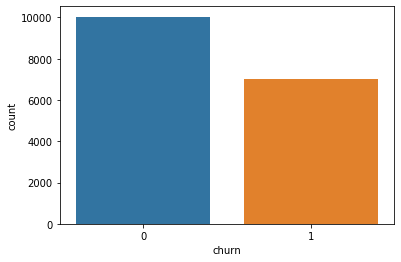

==================== After balancing the Training Set ========================== 
 1    7032
0    7032
Name: churn, dtype: int64


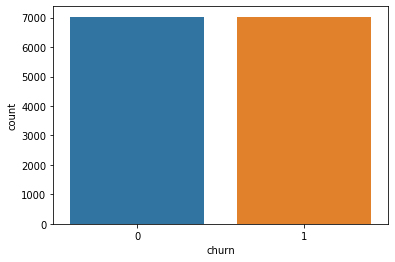

============================= Feature Scaling ================================== 

============================ is there any string ===============================
 age                          0
deposits                     0
withdrawal                   0
purchases_partners           0
purchases                    0
cc_taken                     0
cc_recommended               0
cc_disliked                  0
cc_liked                     0
cc_application_begin         0
app_downloaded               0
web_user                     0
ios_user                     0
android_user                 0
registered_phones            0
waiting_4_loan               0
cancelled_loan               0
received_loan                0
rejected_loan                0
left_for_two_month_plus      0
left_for_one_month           0
reward_rate                  0
is_referred                  0
housing_O                    0
housing_R                    0
payment_type_Bi-Weekly       0
payment_type_Monthly         

In [7]:
X_train, X_test, y_train, y_test = prepare_data_for_model()

In [8]:
def model_building(X_train, X_test, y_train, y_test):
    #X_train, X_test, y_train, y_test = prepare_data_for_model() # function call
    classifier = LogisticRegression(random_state = 0,solver='lbfgs')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True, fmt='g')
    plt.show()
    
    Precission_score = precision_score(y_pred, y_test)
    Recall_Score = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    Accuracy_Score = accuracy_score(y_test, y_pred)
    
    
    print("================================= Result Summary ==============================\n")  
    print("Test Data Accuracy: %0.3f" %Accuracy_Score )
    print("Test Data Precission_score: %0.3f" % Precission_score  )
    print("Test Data Recall_Score: %0.3f" % Recall_Score )
    print("Test Data F1_score: %0.3f" % F1_score)
    
    print("================================= cross_val_score ==============================\n")  
    
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Model Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
    print("================================= Analyzing Coefficients ==============================\n")  
    A_C = pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)
    print("Analyzing Coefficients:",A_C)



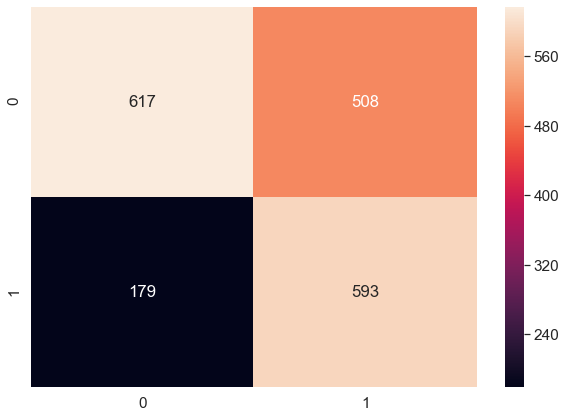

================================= Result Summary ==============================

Test Data Accuracy: 0.638
Test Data Precission_score: 0.768
Test Data Recall_Score: 0.768
Test Data F1_score: 0.633
================================= cross_val_score ==============================

Model Accuracy: 0.657 (+/- 0.030)
================================= Analyzing Coefficients ==============================

Analyzing Coefficients:                      features      coef
0                         age -0.164501
1                    deposits -0.067179
2                  withdrawal  0.047239
3          purchases_partners -0.759323
4                   purchases -0.072718
5                    cc_taken  0.077440
6              cc_recommended  0.038697
7                 cc_disliked -0.027234
8                    cc_liked  0.005326
9        cc_application_begin  0.032210
10             app_downloaded -0.060739
11                   web_user  0.128225
12                   ios_user  0.109084
13            

In [9]:
model_building(X_train, X_test, y_train, y_test)

## --------------* Improve the model accuracy* ----------------------

In [10]:
def after_feature_selection_model(X_train, X_test, y_train, y_test,user_identifier):
    classifier = LogisticRegression(random_state = 0,solver='lbfgs') 
    rfe = RFE(classifier, 20)
    rfe = rfe.fit(X_train, y_train)
    
    print("================================= summarize the selection of the attributes ==============================\n")
    print("support:",rfe.support_)
    print("ranking",rfe.ranking_)
    X_train.columns[rfe.support_]
    print("================================= New Correlation Matrix ==============================\n")
    
    sn.set(style="white")

    # Compute the correlation matrix
    corr = X_train[X_train.columns[rfe.support_]].corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(18, 15))

    # Generate a custom diverging colormap
    cmap = sn.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})  
    plt.show()
    
    print("================================= logesting Regression Model ==============================\n")
    classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

    # Predicting Test Set
    y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
    
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True, fmt='g')
    plt.show()
    
    Precission_score = precision_score(y_pred, y_test)
    Recall_Score = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    Accuracy_Score = accuracy_score(y_test, y_pred)
    
    
    print("================================= Result Summary ==============================\n")  
    print("Test Data Accuracy: %0.3f" %Accuracy_Score )
    print("Test Data Precission_score: %0.3f" % Precission_score  )
    print("Test Data Recall_Score: %0.3f" % Recall_Score )
    print("Test Data F1_score: %0.3f" % F1_score)
    
    print("================================= cross_val_score ==============================\n")  
    
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Model Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
    print("================================= Analyzing Coefficients ==============================\n")  
    A_C = pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)
    print("Analyzing Coefficients:",A_C)

    final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
    final_results['predicted_churn'] = y_pred
    final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
    return final_results

================================= summarize the selection of the attributes ==============================

support: [ True  True  True  True  True  True  True False False False  True  True
  True False  True False  True  True  True False False  True False  True
 False  True  True  True False  True False False False False False False
 False False False False False]
ranking [ 1  1  1  1  1  1  1 16 22 13  1  1  1 18  1  3  1  1  1 14 17  1  2  1
 12  1  1  1 10  1 11 21 19  8  9  4 15  7  5  6 20]
================================= New Correlation Matrix ==============================



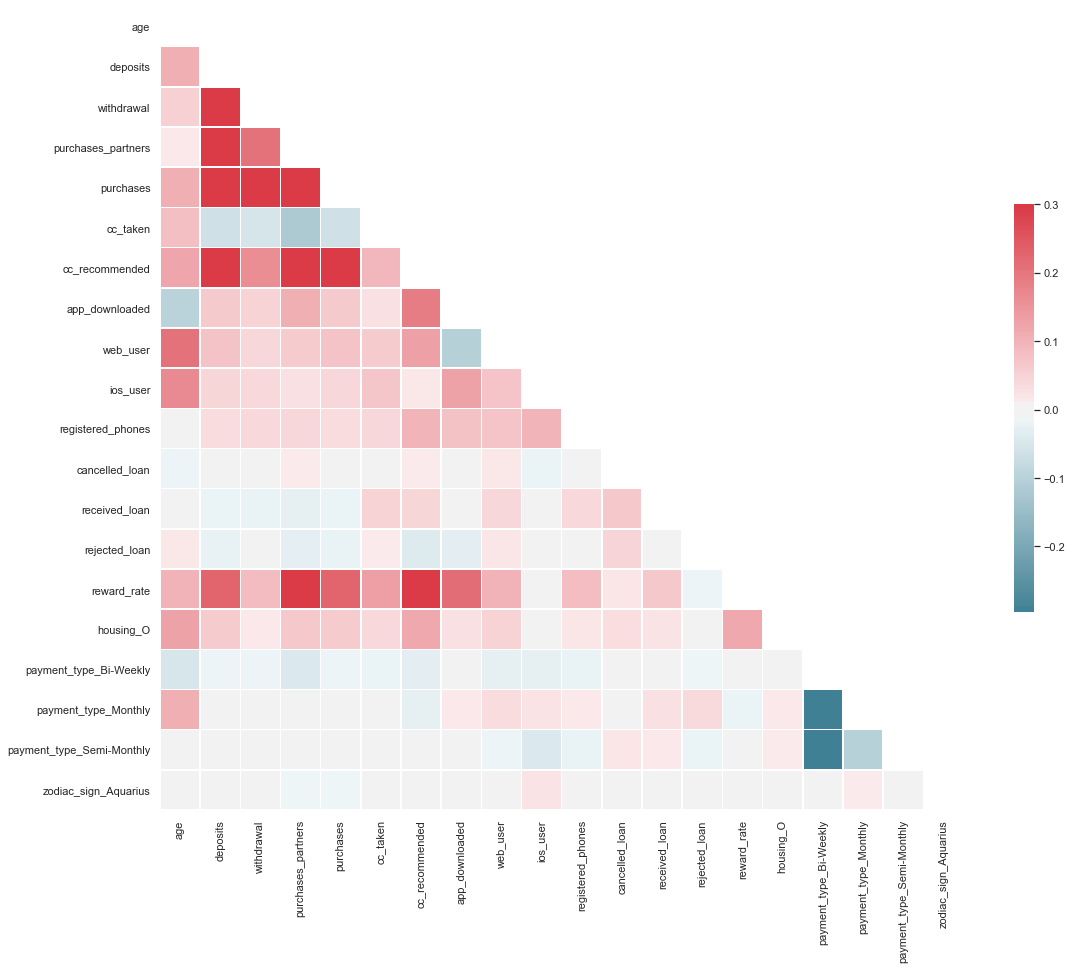

================================= logesting Regression Model ==============================



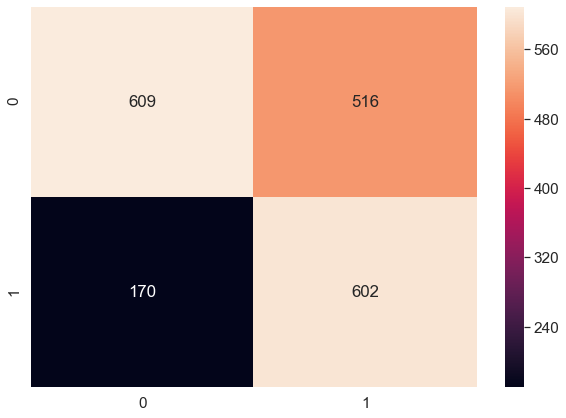

================================= Result Summary ==============================

Test Data Accuracy: 0.638
Test Data Precission_score: 0.780
Test Data Recall_Score: 0.780
Test Data F1_score: 0.637
================================= cross_val_score ==============================

Model Accuracy: 0.657 (+/- 0.030)
================================= Analyzing Coefficients ==============================

Analyzing Coefficients:                      features      coef
0                         age -0.163092
1                    deposits -0.063216
2                  withdrawal  0.053336
3          purchases_partners -0.746426
4                   purchases -0.064508
5                    cc_taken  0.083192
6              cc_recommended  0.067342
7              app_downloaded -0.048333
8                    web_user  0.133597
9                    ios_user  0.093144
10          registered_phones  0.091624
11             cancelled_loan  0.054700
12              received_loan  0.108301
13            

,user,churn,predicted_churn
0,20839,0.0,0
1,15359,1.0,0
2,34210,1.0,0
3,57608,1.0,1
4,11790,0.0,0
...,...,...,...
1892,51126,0.0,0
1893,26821,0.0,1
1894,25599,0.0,1
1895,67681,0.0,1


In [12]:
after_feature_selection_model(X_train, X_test, y_train, y_test,user_identifier)